## 建構神經網路

In [2]:
import numpy as np
x = np.array([-1,1,2])
x

array([-1,  1,  2])

In [3]:
x > 0 

array([False,  True,  True])

In [4]:
(x > 0).astype(int)

array([0, 1, 1])

In [5]:
def threshold_function(x):
    y = x > 0
    return y.astype(int)

x = np.array([-1,1,2])

threshold_function(x)


array([0, 1, 1])

In [7]:
def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))
x = np.array([-1,1,2])
sigmoid_function(x)

array([0.26894142, 0.73105858, 0.88079708])

In [8]:
x = np.array([-100,1,200])
sigmoid_function(x)

array([3.72007598e-44, 7.31058579e-01, 1.00000000e+00])

In [9]:
def tangent_function(x):
    return (1 - np.exp(-2*x)) / (1 + np.exp(-2*x))

x = np.array([-1,1,2])
tangent_function(x)


array([-0.76159416,  0.76159416,  0.96402758])

In [10]:
np.tanh(x)

array([-0.76159416,  0.76159416,  0.96402758])

In [11]:
def relu_function(x):
    return np.maximum(0,x)

x = np.array([-1,1,2])
relu_function(x)


array([0, 1, 2])

In [12]:
import numpy as np
X = np.array( [1,2])

W = np.array([[1,3,5],\
              [2,4,6]])

Y = np.dot(X,W)
Y


array([ 5, 11, 17])

In [13]:
network = {}
network['w1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
network['b1'] = np.array([0.1,0.2,0.3])
network['w2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
network['b2'] = np.array([0.1,0.2])


In [14]:
x = np.array([1,0.5])
a = np.dot(x, network['w1']) + network['b1']
a

array([0.3, 0.7, 1.1])

In [15]:
z = sigmoid_function(a)
z

array([0.57444252, 0.66818777, 0.75026011])

In [17]:
y = np.dot(z, network['w2']) + network['b2']
y

array([0.51615984, 1.21402696])

In [18]:
def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

softmax_function(y)

array([0.33228528, 0.66771472])

In [19]:
def mean_squared_err(y_hat, y):
    return 0.5 * np.sum((y_hat - y) ** 2)


In [20]:
def cross_entropy_err(y_hat, y):
    delta = 1e-8
    return -np.sum(y*np.log(y_hat + delta))


## 訓練神經網路 

In [21]:
def func(x):
    return x ** 2 

def dfunc(f, x):
    h = 1e-4 
    return (f(x+h) - f(x)) / (h)


In [22]:
func(3)

9

In [23]:
dfunc(func, 3)

6.000100000012054

In [24]:
# 切線函數
def tfunc(f, x, t):
    d = dfunc(f, x)
    y = f(x) - d*x
    return d*t + y


Populating the interactive namespace from numpy and matplotlib


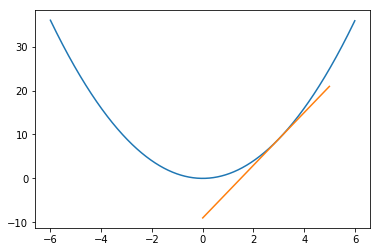

In [26]:
% pylab inline
import matplotlib.pyplot as plt
# 繪製 x ^ 2 
x = np.arange(-6, 6, 0.01)
y = func(x)
plt.plot(x, y)

# 繪製x = 3 時的切線
x2 = np.arange(0, 5, 0.01)
y2 = tfunc(func, 3, x2)
plt.plot(x2, y2)


In [27]:
def dfunc(f, x):
    h = 1e-4 
    return (f(x+h) - f(x-h)) / (2*h)

In [28]:
def dfunc(f, x):
    h = 1e-4 
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'])
    while not it.finished:     
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()   
    return grad


In [31]:
def func(x):
    return x ** 2 


In [32]:
def dfunc(f, x):
    h = 1e-4 
    return (f(x+h) - f(x-h)) / (2*h)

In [33]:
def gradient_descent(func, init_x, lr = 0.3, epochs = 100):    
    x = init_x       
    res = [x]
    for i in range(epochs):         
        grad = dfunc(func,x)        
        x = x - grad * lr
        res.append(x)
    return np.array(res)


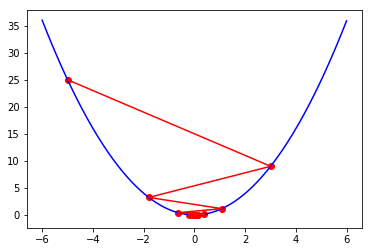

In [34]:
x = gradient_descent(func, -5, lr=0.8)

t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')    
plt.scatter(x, func(x), c='r')    


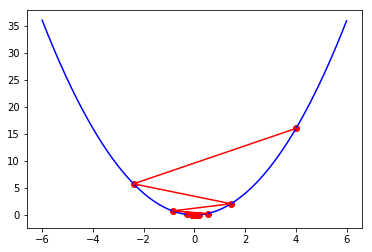

In [35]:
x = gradient_descent(func, 4, lr=0.8)

t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')    
plt.scatter(x, func(x), c='r')    


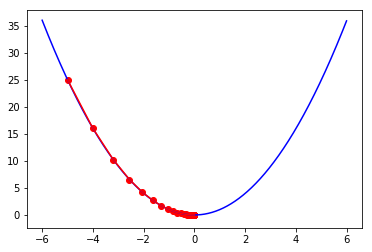

In [36]:
x = gradient_descent(func, -5, lr=0.1)

t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')    
plt.scatter(x, func(x), c='r')    


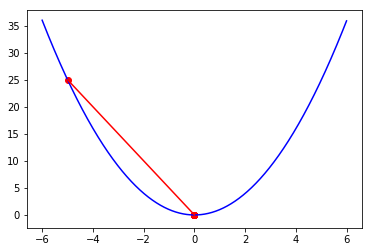

In [37]:
x = gradient_descent(func, -5, lr=0.5)

t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')    
plt.scatter(x, func(x), c='r')    


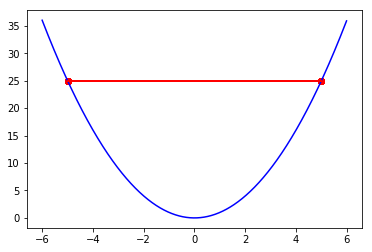

In [38]:
x = gradient_descent(func, -5, lr=1)

t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')    
plt.scatter(x, func(x), c='r')    


## 如何計算神經網路的梯度

In [39]:
# 初始網路
x  = np.array([0.6, 0.9])
np.random.seed(42)
weight   = np.random.randn(2,3)
z            = np.dot(x, weight)
# 取得預測值 y_hat
y_hat    = softmax_function(z)

# 計算代價(損失)
y        = np.array([0, 0, 1])
cross_entropy_err(y_hat, y)


1.8025260716416405

In [ ]:
def dfunc(f, x):
    h = 1e-4 
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'])
    while not it.finished:     
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()   
    return grad
def predict(x):
    return np.dot(x, weight)

def loss(x, y):
    z = predict(x)
    y_hat = softmax_function(z)
    loss = cross_entropy_err(y_hat, y)
    return loss

func = lambda w: loss(x, y)
dfunc(func, weight)


## 訓練神經網路

In [42]:
import numpy as np

def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))

def dfunc(f, x):
    h = 1e-4 
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'])
    while not it.finished:     
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()   
    return grad

def cross_entropy_err(y_hat, y):
    delta = 1e-8
    return -np.sum(y*np.log(y_hat + delta))


class ANN:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid_function(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax_function(a2)
        return y
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return cross_entropy_err(y_hat, y)
        
    def numerical_gradient(self, x, y):
        loss_W = lambda W: self.loss(x, y)
        grads = {}
        grads['W1'] = dfunc(loss_W, self.params['W1'])
        grads['b1'] = dfunc(loss_W, self.params['b1'])
        grads['W2'] = dfunc(loss_W, self.params['W2'])
        grads['b2'] = dfunc(loss_W, self.params['b2'])
        return grads

In [43]:
net = ANN(input_size=4, hidden_size=5, output_size=3)


In [45]:
from sklearn.datasets import load_iris
iris = load_iris()
x= iris.data


In [46]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [48]:
y = np.zeros((len(iris.target), 3))
for idx, val in enumerate(iris.target):
    y[idx, val] = 1
#y

In [49]:
epochs = 3000
lr     = 0.01

train_loss = []
for i in range(epochs):         
    grad = net.numerical_gradient(x,y)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] = net.params[key] - lr * grad[key]
    loss = net.loss(x, y)
    train_loss.append(loss)


Text(0.5,1,'Training Loss')

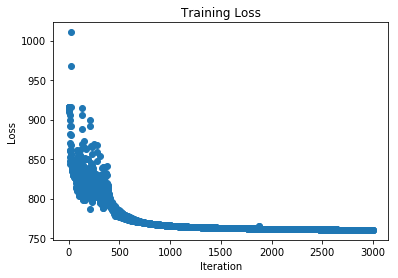

In [50]:
plt.scatter(range(0,3000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')


In [56]:
#net.predict(x)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix
predicted = np.argmax(net.predict(x), axis=1)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [57]:
accuracy_score(iris.target, predicted)

0.98

In [58]:
confusion_matrix(iris.target, predicted)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])